# Exploratory Statistical Analyses - Case Study using NHANES Data

## Univariate Data Analysis

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Loading the NHANES Dataset for 2015 and 2016 (most comprehensive dataset):

In [ ]:
da = pd.read_csv("nhanes_2015_2016.csv")

### Frequency tables

The numbers 1, 2, 3, 4, 5, 9 seen below are integer codes for the 6 possible non-missing values of the DMDEDUC2 variable.

In [5]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [7]:
pd.isnull(da.DMDEDUC2).sum()

261

Creating a new variable called 'DMDEDUC2x' that is recoded with text labels.

In [8]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

Similarly for Gender:

In [23]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [24]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
x / x.sum()

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

According to the results above, 11% of the people who have a non-missing education value have completed less than 9 years of formal education.

### Numerical summaries

Next we look at frequencies for a systolic blood pressure measurement ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1)).

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89.  Considering only the systolic condition, we can calculate the proportion of the NHANES sample who would be considered to have pre-hypertension. 

In [13]:
np.mean((da.BPXSY1 >= 120) & (da.BPXSY1 <= 139))  # "&" means "and"

0.366870095902354

Calculating the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [10]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure.

In [11]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
np.mean(a | b) # "|" means "or"

0.43975588491717527

Blood pressure measurements are affected by a phenomenon called "white coat hypertension", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers.  Typically this effect subsides if the blood pressure is measured several times in sequence.  In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject.

In [12]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

0.6749860309182343
0.3490407897187558


These mean differences are positive -- the first systolic blood pressure measurement is around 0.67 mm Hg greater than the second systolic blood pressure measurement, and the first diastolic blood pressure measurement is around 0.35 mm Hg greater than the second diastolic blood pressure measurement.  This is consistent with the presence of "white coat hypertension".

### Graphical summaries

Distribution of body weight (in Kg), shown as a histogram.  The distribution is right-skewed.

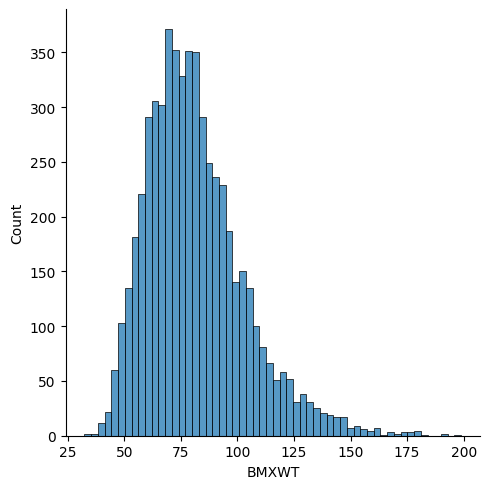

In [13]:
sns.displot(da.BMXWT.dropna())

Looking at the histogram of systolic blood pressure measurements, you can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units.

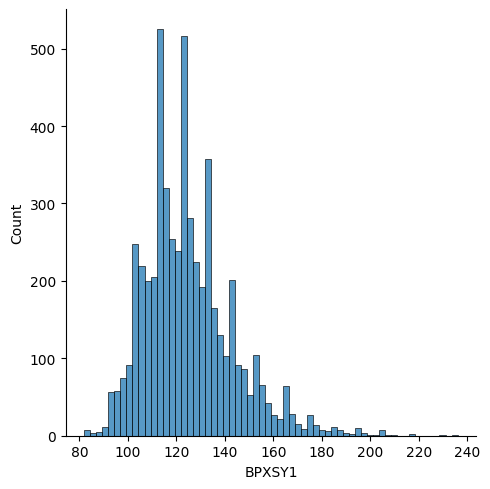

In [14]:
sns.displot(da.BPXSY1.dropna())

Comparing the distributions of the first and second systolic blood pressure measurements, and the first and second diastolic blood pressure measurements. As expected, diastolic measurements are substantially lower than systolic measurements.  Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement.  This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

Text(0, 0.5, 'Blood pressure in mm/Hg')

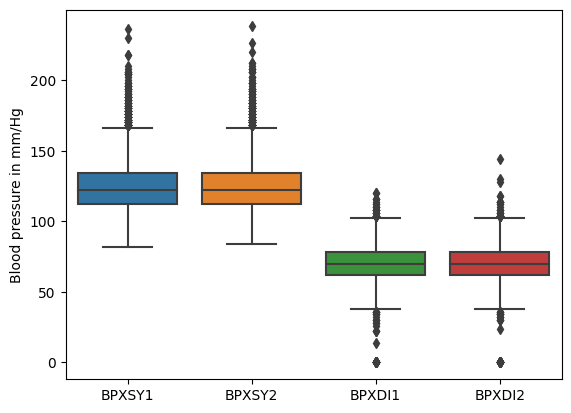

In [15]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_ylabel("Blood pressure in mm/Hg")

### Stratification

Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

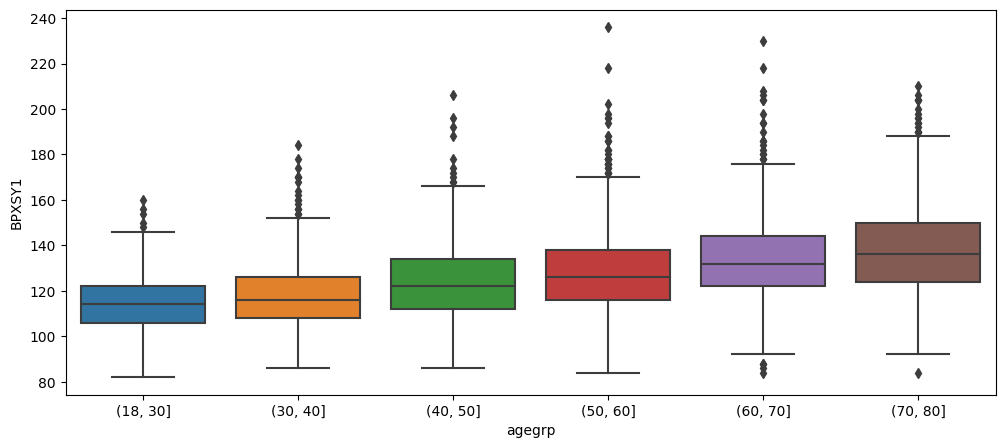

In [25]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) 
plt.figure(figsize=(12, 5)) 
sns.boxplot(x="agegrp", y="BPXSY1", data=da)  

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

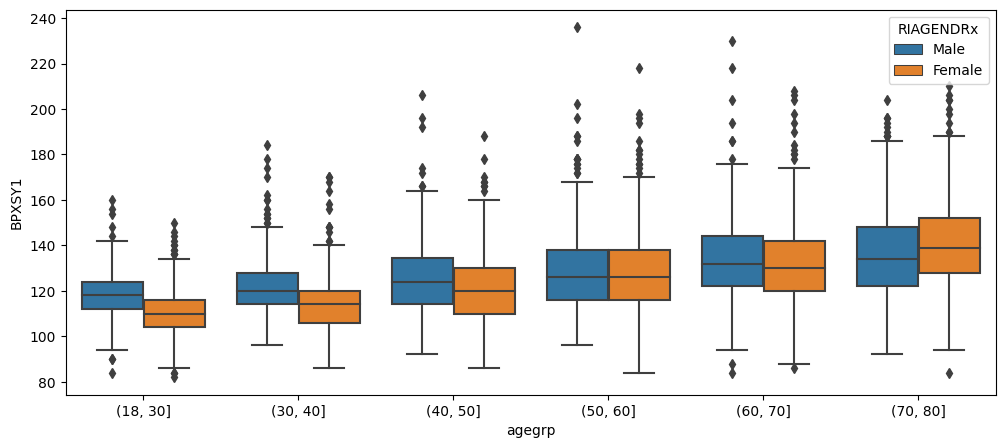

In [26]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

Doubly stratifying the data by gender and age, we see from that older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

Stratifying in the form of a table jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously. One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [27]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255


## Multivariate Data Analysis
   

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

Bivariate data arise when every person in the NHANES dataset is assessed with respect to two traits.  The NHANES subjects were assessed for many more than two traits, but we can consider two traits at a time here.  

Making a scatterplot of arm length against leg length.

<Axes: xlabel='BMXLEG', ylabel='BMXARML'>

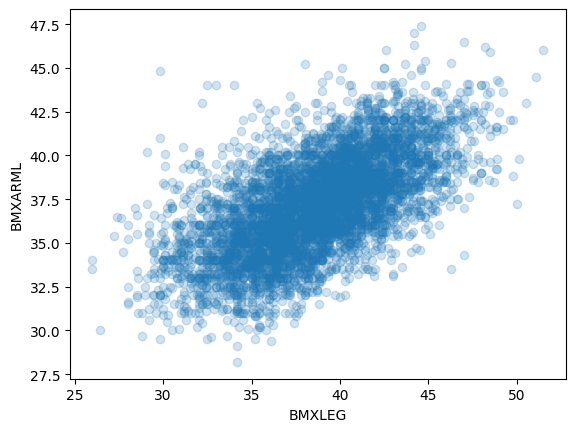

In [81]:
sns.regplot(x="BMXLEG", y="BMXARML", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

This density plot also shows the Pearson correlation coefficient between the arm length and leg length, which is 0.62.  A correlation of 0.62 would be considered a moderately strong positive dependence. 

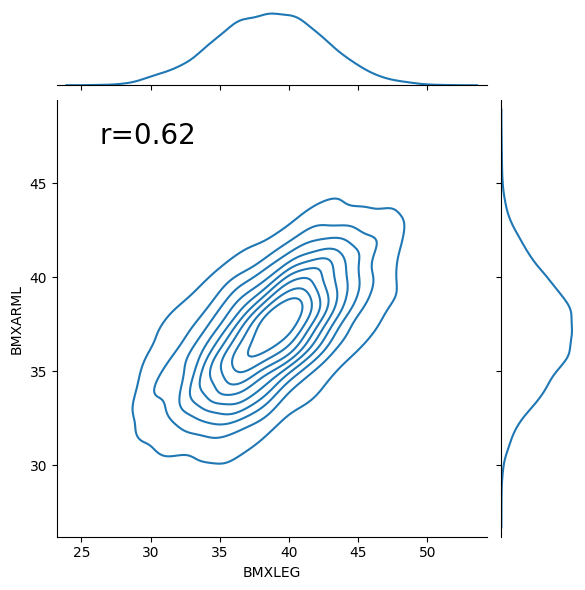

In [82]:
p = sns.jointplot(x="BMXLEG", y="BMXARML", kind='kde', data=da)
r = da[["BMXLEG", "BMXARML"]].corr().iloc[0, 1]
p.ax_joint.annotate("r=%.2f" % r, xy=(0.1, 0.9), xycoords="axes fraction", size=20);

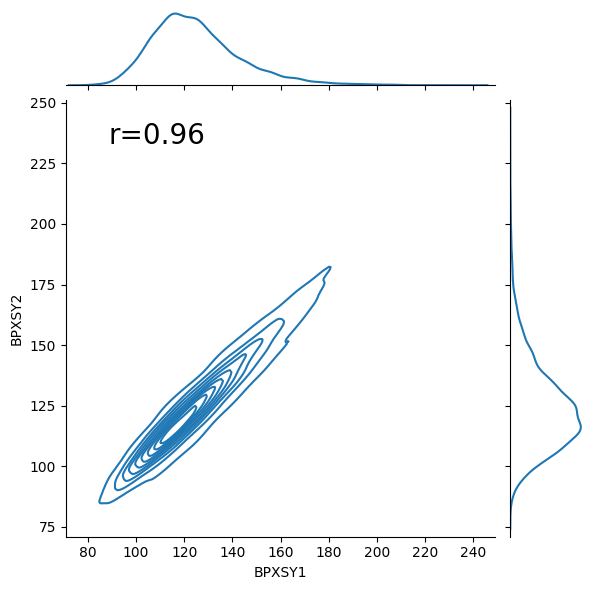

In [84]:
p = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da)
r = da[["BPXSY1", "BPXSY2"]].corr().iloc[0, 1]
p.ax_joint.annotate("r=%.2f" % r, xy=(0.1, 0.9), xycoords="axes fraction", size=20);

Looking at two repeated measures of systolic blood pressure, taken a few minutes apart on the same person.  These values are very highly correlated, with a correlation coefficient of around 0.96.

Below, we probe the relationship between leg length and arm length, stratifying first by gender, then by gender and ethnicity. The gender-stratified plot indicates that men tend to have somewhat longer arms and legs than women -- this is reflected in the fact that the cloud of points on the left is shifted slightly up and to the right relative to the cloud of points on the right.  In addition, the correlation between arm length and leg length appears to be somewhat weaker in women than in men.

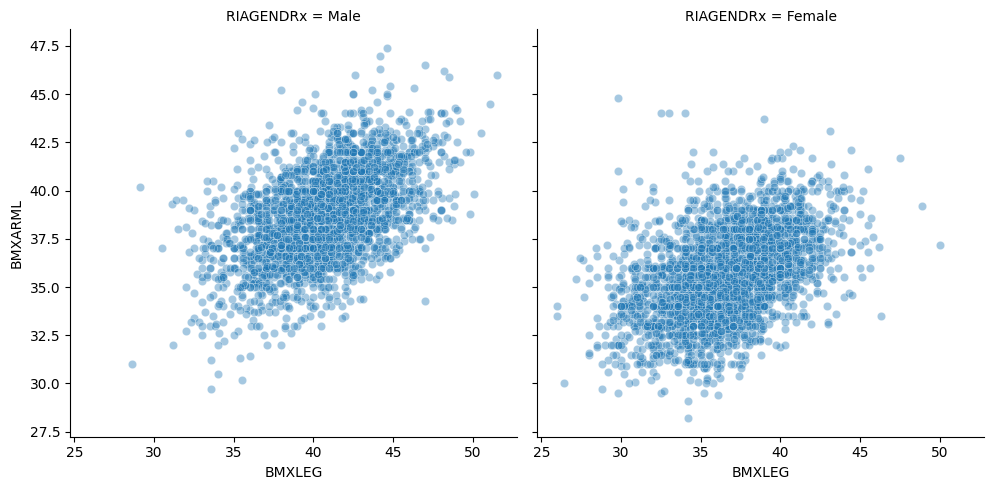

In [85]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIAGENDRx", height=5).map(sns.scatterplot, "BMXLEG", "BMXARML", alpha=0.4).add_legend();

Consistent with the scatterplot, a slightly weaker correlation between arm length and leg length in women (compared to men) can be seen by calculating the correlation coefficient separately within each gender. 

In the results below, we see that the correlation between leg length and arm length in men is 0.50, while in women the correlation is 0.43.

In [86]:
print(da.loc[da.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].corr())
print(da.loc[da.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


Creating new versions of these two variables using text labels instead of numbers to represent the categories.  Omitting people who responded "Don't know" or who refused to answer these questions.

In [87]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDMARTLx != "Refused"), :]

Creating a normalized contingency table, counting the number of people in each cell defined by a combination of education and marital status.

In [20]:
x.apply(lambda z: z/z.sum(), axis=1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [21]:
x.apply(lambda z: z/z.sum(), axis=0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


We see here that the plurality of divorced people have some college but have not graduated from college, while the plurality of married people are college graduates.

There are a number of intriguing results here.  For example, the marriage rate seems to drop as college-educated people get older (e.g. 71% of college educated women between 49 and 50 are married, but only 65% of college educated women between 50 and 59 are married, an even larger drop occurs for men).  However in people with a HS/GED level of education, the marriage rate is higher for older people (although it is lower compared to the college educated sample).  There are a number of possible explanations for this, for example, that remarriage after divorce is less common among college graduates.

Looking at the proportion of people in each marital status category, for each combination of the gender and education variables.  This analyses yields some interesting trends, notably that women are much more likely to be widowed or divorced than men (e.g. women in the HS/GED group are around 3 times more likely to be widowed than men in the HS/GED group).

In [89]:
db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [90]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


Noting that marital status is associated with many factors, including gender and eduational status, but also varies strongly by age and birth cohort.  For example, it is unlikely for young people to be widowed, and it is less likely for older people to be "never married", since a person can transition from "never married" into one of the other categories, but can never move back.

Considering the distribution of ages for people who are currently in each marital status category:

The violinplot below is based on the same data as the boxplot above.  We can see quite clearly that the distributions with low mean (living with partner, never married) are strongly right-skewed, while the distribution with high mean (widowed) is strongly left-skewed.  The other distributions have intermediate mean values, and are approximately symmetrically distributed.  Note also that the never-married distribution has a long shoulder, suggesting that this distributions includes many people who are never-married because they are young, and have not yet reached the ages when people typically marry, but also a substantial number of people will marry for the first time anywhere from their late 30's to their mid-60's.

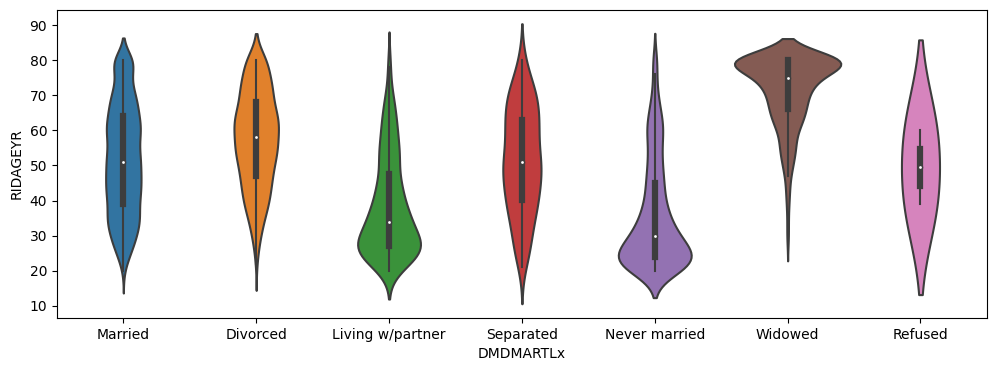

In [92]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(x=da.DMDMARTLx, y=da.RIDAGEYR)

Also comparing the distributions of BMI within a series of 10-year age bands.

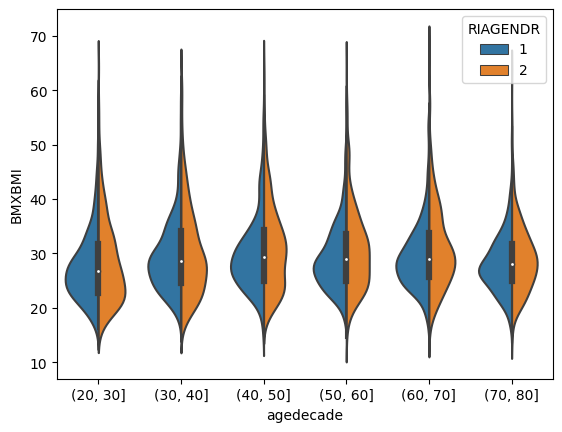

In [4]:
da["agedecade"] = pd.cut(da["RIDAGEYR"], range(20, 90, 10))
sns.violinplot(data=da, y="BMXBMI", x="agedecade", hue="RIAGENDR", split = True);

BMI is right-skewed in all strata, and is slightly higher in age ranges 40-50 and 50-60.  The BMI distributions for females (RIAGENDR=2) are more dispered than the BMI distributions for males (RIAGENDR=1). 

## Sampling Distributions

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

### Sampling distribution of the mean

Repeatedly subsample two disjoint subsets of size 100 from the NHANES data, to calculate the mean systolic blood pressure within each of these two subsets, then calculate the difference between these two means.  This difference reflects the "chance variation" that would have been observed if the NHANES project had only had the resources to sample 100 participants for their study.  By sampling two subsets of size 100 and comparing the resulting calculated means, we can see how the findings of two researchers independently studying the same population might differ from each other by chance.  

The subsampling process described above is then repeated 1000 times, so we can see how two samples of size 100 from the NHANES population tend to differ in terms of their mean systolic blood pressure.


In [94]:
m = 100 # Subsample size
sbp_diff = [] # Storage for our subsample mean differences

for i in range(1000):
    dx = da.sample(2*m)  # We need two subsamples of size m
    dx1 = dx.iloc[0:m, :]  # First subsample
    dx2 = dx.iloc[m:, :]  # Second subsample
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())  # The difference of mean BPXSY1 values

Looking at the histogram of the 1000 mean differences generated above, we see that they typically fall between negative 5 and positive 5.  This means that two researchers independently studying blood pressure in the same population may by chance obtain sample means that are up to around 5 units different, but are quite unlikely to obtain sample means that are by chance more than 10 units different.  These findings depend strongly on the subsample size.  Here we are using subsamples of size 100, if we were to use larger subsamples, the chance differences would be smaller.

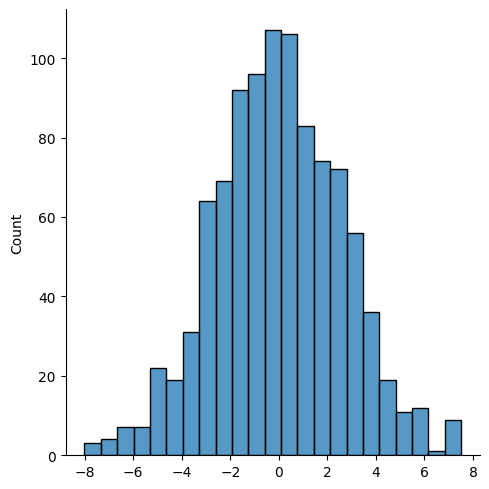

In [95]:
sns.displot(sbp_diff)

In [5]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean        0.024112
std         2.717955
min        -8.049572
25%        -1.778372
50%        -0.094449
75%         1.829041
max         8.198947
dtype: float64

The results shown above indicate that the mean systolic blood pressures calculated for two samples each with 100 people will typically differ by around 2.8 mm/Hg (the standard deviation), and will rarely differ by more than 5 mm/Hg.

The sample size is a major determinant of the chance fluctuations in any statistic.  Above samples of size 100, below we perform the same analysis using samples of size 400. 

count    1000.000000
mean       -0.004508
std         1.310569
min        -4.530395
25%        -0.830459
50%        -0.007743
75%         0.827344
max         5.091881
dtype: float64

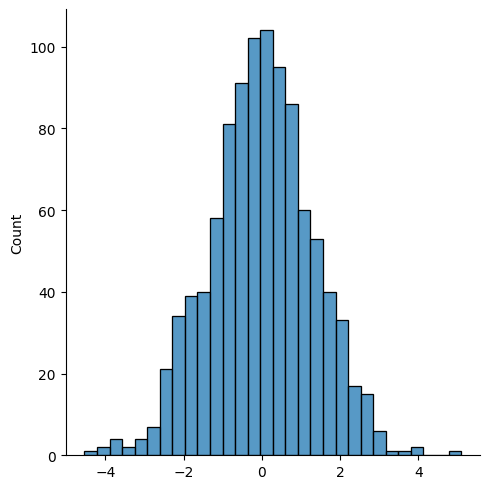

In [96]:
m = 400  # Change the sample size, everything else below is unchanged from the cells above
sbp_diff = []

for i in range(1000):
    dx = da.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    
sns.displot(sbp_diff)
pd.Series(sbp_diff).describe()

We see that with samples of size 400, the standard deviation is around 1.38, which is close to half of what it was when we used samples of size 100.  The smaller standard deviation indicates that the chance flucatations in the mean systolic blood pressure are smaller when we have a larger sample size.  This implies that we are able to estimate the population mean systolic blood pressure with more precision when we have samples of size 400 compared to when we have samples of size 100.

Importantly, increasing the sample size by a factor of 4 (from 100 to 400) led to a reduction of the standard deviation by a factor of 2.


Modifying the subsampling analysis from above to consider the Pearson correlation coefficient between systolic and diastolic blood pressure.

In [97]:
for m in 100, 400:  # m is the subsample size
    sbp_diff = [] # calculate correlation coefficients from independent samples of size m
    for i in range(1000):
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = dx1.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0,1]
        r2 = dx2.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0,1]
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))

m=100 0.17304241003178958 0.1414213562373095
m=400 0.09069712906632758 0.07071067811865475


The simulation above shows that when the subsample size increases from 100 to 400 (a factor of 4), the standard deviation of the difference between two correlation coefficients decreases by roughly a factor of 2.  The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data. 

### The shape of sampling distributions

The central limit theorem implies that many (but not all) statistics have approximately normal sampling distributions, even if the underlying data are not close to being normally distributed.

Using a histogram to look at the distribution of individual systolic blood pressure values to illustrate this.  Note that it is somewhat right-skewed.

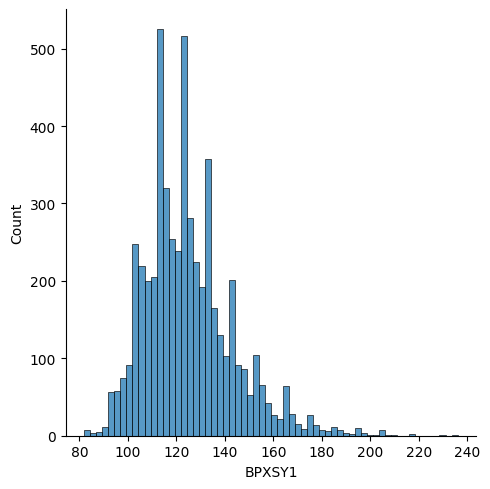

In [98]:
sns.displot(da.BPXSY1.dropna())

Now calculating 1000 sample means from 1000 subsamples of size 50 and inspect their distribution.

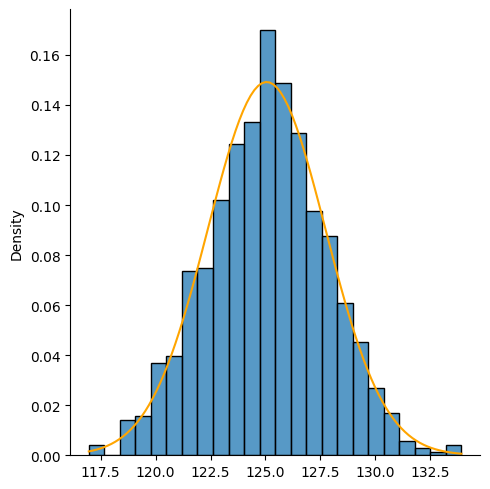

In [99]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
d = sns.displot(sbp_mean, stat="density")

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')

The plots above show that while the distribution of individual systolic blood pressure measures is somewhat skewed to the right, the distribution of means of size 50 is approximately symmetric.  The distribution of means is also approximately normal, as shown by the orange curve, which is the best-fitting normal approximation to the data.